In [1]:
from google.colab import drive
import glob
import itertools
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import layers, metrics, regularizers

In [2]:
mount = '/content/gdrive'

drive.mount(mount)

drive_root = mount + '/My Drive/Data Mining Research Paper'

%cd $drive_root

Mounted at /content/gdrive
/content/gdrive/My Drive/Data Mining Research Paper


In [3]:
no_of_samples = 600
images = []
labels = []
length = 128
width = 128
size = length, width

labels_map = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'f': 4,
    'g': 5,
}

In [4]:
for label in labels_map:
  
  temp = 0
  
  for path in glob.glob('Dataset/SL_Muhammad/' + label + '/*.jpg'):
    if temp < no_of_samples:
      img = cv2.imread(path)
      
      grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      inp = cv2.resize(grayscale, size)

      images.append(inp)
      labels.append(labels_map[label])
      temp = temp + 1
  
  print(label)

a
b
c
d
f
g


(-0.5, 127.5, 127.5, -0.5)

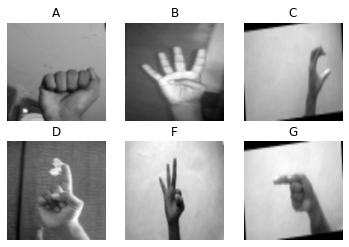

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.imshow(images[no_of_samples * 0 + 1], cmap='gray')
ax1.set(title='A')
ax1.axis('off')
ax2.imshow(images[no_of_samples * 1 + 1], cmap='gray')
ax2.set(title='B')
ax2.axis('off')
ax3.imshow(images[no_of_samples * 2 + 1], cmap='gray')
ax3.set(title='C')
ax3.axis('off')
ax4.imshow(images[no_of_samples * 3 + 1], cmap='gray')
ax4.set(title='D')
ax4.axis('off')
ax5.imshow(images[no_of_samples * 4 + 1], cmap='gray')
ax5.set(title='F')
ax5.axis('off')
ax6.imshow(images[no_of_samples * 5 + 1], cmap='gray')
ax6.set(title='G')
ax6.axis('off')

In [6]:
images = np.asarray(images, dtype=np.float32)
images = images/255.0
labels = np.asarray(labels)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

binarizer = LabelBinarizer()
Y_train = binarizer.fit_transform(Y_train)
Y_test = binarizer.fit_transform(Y_test)

In [8]:
l2_param = 0.0001

In [9]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='valid', input_shape=(length,width,1), kernel_regularizer=regularizers.l2(l2_param), kernel_initializer='he_uniform', activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
    
model.add(layers.Conv2D(32, 3, 3, padding='valid', kernel_regularizer=regularizers.l2(l2_param), kernel_initializer='he_uniform', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
  
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(6, kernel_initializer='glorot_uniform', activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                        

In [10]:
datagen = ImageDataGenerator(
            width_shift_range=0.2, 
            height_shift_range=0.2) 
datagen.fit(X_train)

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

no_of_epochs = 30
history = model.fit(
    datagen.flow(X_train, Y_train),
    epochs=no_of_epochs,
    validation_data = (X_test, Y_test)
)

Epoch 1/30
79/79 [==============================] - 52s 640ms/step - loss: 1.1100 - accuracy: 0.6353 - val_loss: 2.4099 - val_accuracy: 0.1870
Epoch 2/30
79/79 [==============================] - 49s 616ms/step - loss: 0.6290 - accuracy: 0.7988 - val_loss: 2.6382 - val_accuracy: 0.3361
Epoch 3/30
79/79 [==============================] - 49s 626ms/step - loss: 0.4866 - accuracy: 0.8429 - val_loss: 2.8621 - val_accuracy: 0.3852
Epoch 4/30
79/79 [==============================] - 50s 629ms/step - loss: 0.3960 - accuracy: 0.8786 - val_loss: 1.7211 - val_accuracy: 0.4102
Epoch 5/30
79/79 [==============================] - 49s 625ms/step - loss: 0.3378 - accuracy: 0.8897 - val_loss: 0.7443 - val_accuracy: 0.7444
Epoch 6/30
79/79 [==============================] - 49s 620ms/step - loss: 0.3092 - accuracy: 0.8980 - val_loss: 0.6038 - val_accuracy: 0.7787
Epoch 7/30
79/79 [==============================] - 50s 635ms/step - loss: 0.2817 - accuracy: 0.9163 - val_loss: 0.4153 - val_accuracy: 0.8722

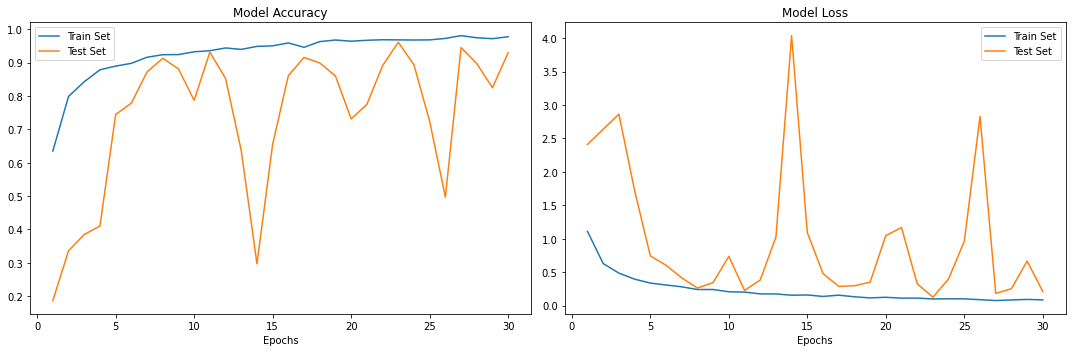

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, no_of_epochs + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Test Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [13]:
y_pred = model.predict(X_test)
print(classification_report(np.argmax(Y_test, axis=1),
                      np.argmax(y_pred, axis=1),
                      target_names=['a', 'b', 'c', 'd', 'f', 'g']))

              precision    recall  f1-score   support

           a       0.99      0.87      0.93       211
           b       0.94      0.89      0.92       182
           c       0.98      0.93      0.96       174
           d       0.80      0.98      0.88       166
           f       0.90      0.95      0.92       172
           g       0.99      0.98      0.98       175

    accuracy                           0.93      1080
   macro avg       0.93      0.93      0.93      1080
weighted avg       0.94      0.93      0.93      1080



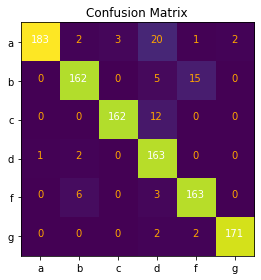

In [14]:
conmat = confusion_matrix(np.argmax(Y_test, axis=1),
                      np.argmax(y_pred, axis=1))
plt.imshow(conmat, interpolation='nearest')
plt.title('Confusion Matrix')
ticks = np.arange(6)
plt.xticks(ticks=ticks, labels=['a', 'b', 'c', 'd', 'f', 'g'])
plt.yticks(ticks=ticks, labels=['a', 'b', 'c', 'd', 'f', 'g'])

thresh = conmat.max() / 2
for i, j in itertools.product(range(conmat.shape[0]), range(conmat.shape[1])):
    plt.text(j, i, conmat[i, j],
    horizontalalignment="center",
    color="white" if conmat[i, j] > thresh else "orange")
    
plt.tight_layout()

plt.show()